In [1]:
import pandas as pd    #Data Cleaning
import numpy as np     #Array Calculation 
import matplotlib.pyplot as plt # Visualization
import seaborn as sns  #Advance analytical Visualization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/decision-tree-employeeset/employee.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
print(df.EmployeeCount.unique())
print(df.EmployeeNumber.unique())
print(df.Over18.unique())
print(df.StandardHours.unique())


[1]
[   1    2    4 ... 2064 2065 2068]
['Y']
[80]


In [8]:
df=df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [10]:
df.shape

(1470, 31)

In [11]:
# Encoding Attribute Variable
df['Attrition']=np.where(df['Attrition']=='Yes',1,0)

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [13]:
# Checking the values in categorical features
print(df.BusinessTravel.value_counts())
print('*************************************')
print(df.Department.value_counts())
print('*************************************')
print(df.EducationField.value_counts())
print('*************************************')
print(df.JobRole.value_counts())
print('*************************************')
print(df.Gender.value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*************************************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
*************************************
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
*************************************
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
*************************************
Male      882
Female    588
Name: Gender, dtype: int64


In [14]:
# Encoding categorical variables into numerical variables
df_dummies=pd.get_dummies(df[['BusinessTravel','Department','EducationField','Gender',\
                                          'JobRole','MaritalStatus','OverTime']],drop_first=True)

In [15]:
df_dummies

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1466,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1467,0,1,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1468,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [16]:
df=df.drop(['BusinessTravel','Department','EducationField','Gender','JobRole',
                                'MaritalStatus','OverTime'],axis=1)

In [17]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [18]:
df.shape

(1470, 24)

In [19]:
df=pd.concat([df,df_dummies],axis=1)

In [20]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


In [21]:
df.shape

(1470, 45)

In [22]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=20)

In [24]:

# Import Tree Classifier Model
from sklearn import tree

# Model-1
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [25]:
# Model-2
dt1=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt1.fit(X_train,y_train)
y_pred1=dt1.predict(X_test)

In [26]:
# Model-3
dt2=tree.DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_leaf=2)
dt2.fit(X_train,y_train)
y_pred2=dt2.predict(X_test)

In [27]:
from sklearn import metrics
print('Accuracy M1:',metrics.accuracy_score(y_test, y_pred))
print('Accuracy M2:',metrics.accuracy_score(y_test, y_pred1))
print('Accuracy M3:',metrics.accuracy_score(y_test, y_pred2))

Accuracy M1: 0.8095238095238095
Accuracy M2: 0.8276643990929705
Accuracy M3: 0.8503401360544217


In [28]:
result=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
result.head()

,Actual,Predicted
1261,0,1
434,0,0
313,0,0
1182,0,0
446,0,0


In [29]:
result=pd.DataFrame({'Actual': y_test,'Predicted': y_pred1})
result.head()

,Actual,Predicted
1261,0,1
434,0,0
313,0,0
1182,0,0
446,0,0


In [30]:
result=pd.DataFrame({'Actual': y_test,'Predicted': y_pred2})
result.head()

,Actual,Predicted
1261,0,0
434,0,0
313,0,0
1182,0,0
446,0,0


In [31]:
from sklearn.model_selection import GridSearchCV
dt_param={"max_depth":[2,3,4,5],
           "max_features":[1,3,5,10],
            "min_samples_split":[2,3,5,10],
           "criterion":["gini","entropy"],
           "min_samples_leaf":[1,2,3,4]}
grid_search=GridSearchCV(dt,param_grid=dt_param,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [32]:
dt3=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features=10,min_samples_leaf=2,min_samples_split=2)
dt3.fit(X_train,y_train)
y_pred3=dt3.predict(X_test)

In [33]:
print('Accuracy M4:',metrics.accuracy_score(y_test, y_pred3))

Accuracy M4: 0.8435374149659864


In [34]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix",confusion_matrix(y_test, y_pred))

Confusion Matrix [[327  44]
 [ 40  30]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       371
           1       0.41      0.43      0.42        70

    accuracy                           0.81       441
   macro avg       0.65      0.65      0.65       441
weighted avg       0.81      0.81      0.81       441



In [36]:
dt2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.28601843,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20625632, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.50772525])

In [37]:
print(dict(zip(X_train.columns, dt2.feature_importances_)))

{'Age': 0.0, 'DailyRate': 0.0, 'DistanceFromHome': 0.0, 'Education': 0.0, 'EnvironmentSatisfaction': 0.0, 'HourlyRate': 0.0, 'JobInvolvement': 0.0, 'JobLevel': 0.0, 'JobSatisfaction': 0.0, 'MonthlyIncome': 0.2860184256711658, 'MonthlyRate': 0.0, 'NumCompaniesWorked': 0.0, 'PercentSalaryHike': 0.0, 'PerformanceRating': 0.0, 'RelationshipSatisfaction': 0.0, 'StockOptionLevel': 0.0, 'TotalWorkingYears': 0.20625632426472076, 'TrainingTimesLastYear': 0.0, 'WorkLifeBalance': 0.0, 'YearsAtCompany': 0.0, 'YearsInCurrentRole': 0.0, 'YearsSinceLastPromotion': 0.0, 'YearsWithCurrManager': 0.0, 'BusinessTravel_Travel_Frequently': 0.0, 'BusinessTravel_Travel_Rarely': 0.0, 'Department_Research & Development': 0.0, 'Department_Sales': 0.0, 'EducationField_Life Sciences': 0.0, 'EducationField_Marketing': 0.0, 'EducationField_Medical': 0.0, 'EducationField_Other': 0.0, 'EducationField_Technical Degree': 0.0, 'Gender_Male': 0.0, 'JobRole_Human Resources': 0.0, 'JobRole_Laboratory Technician': 0.0, 'JobR

<function matplotlib.pyplot.show(close=None, block=None)>

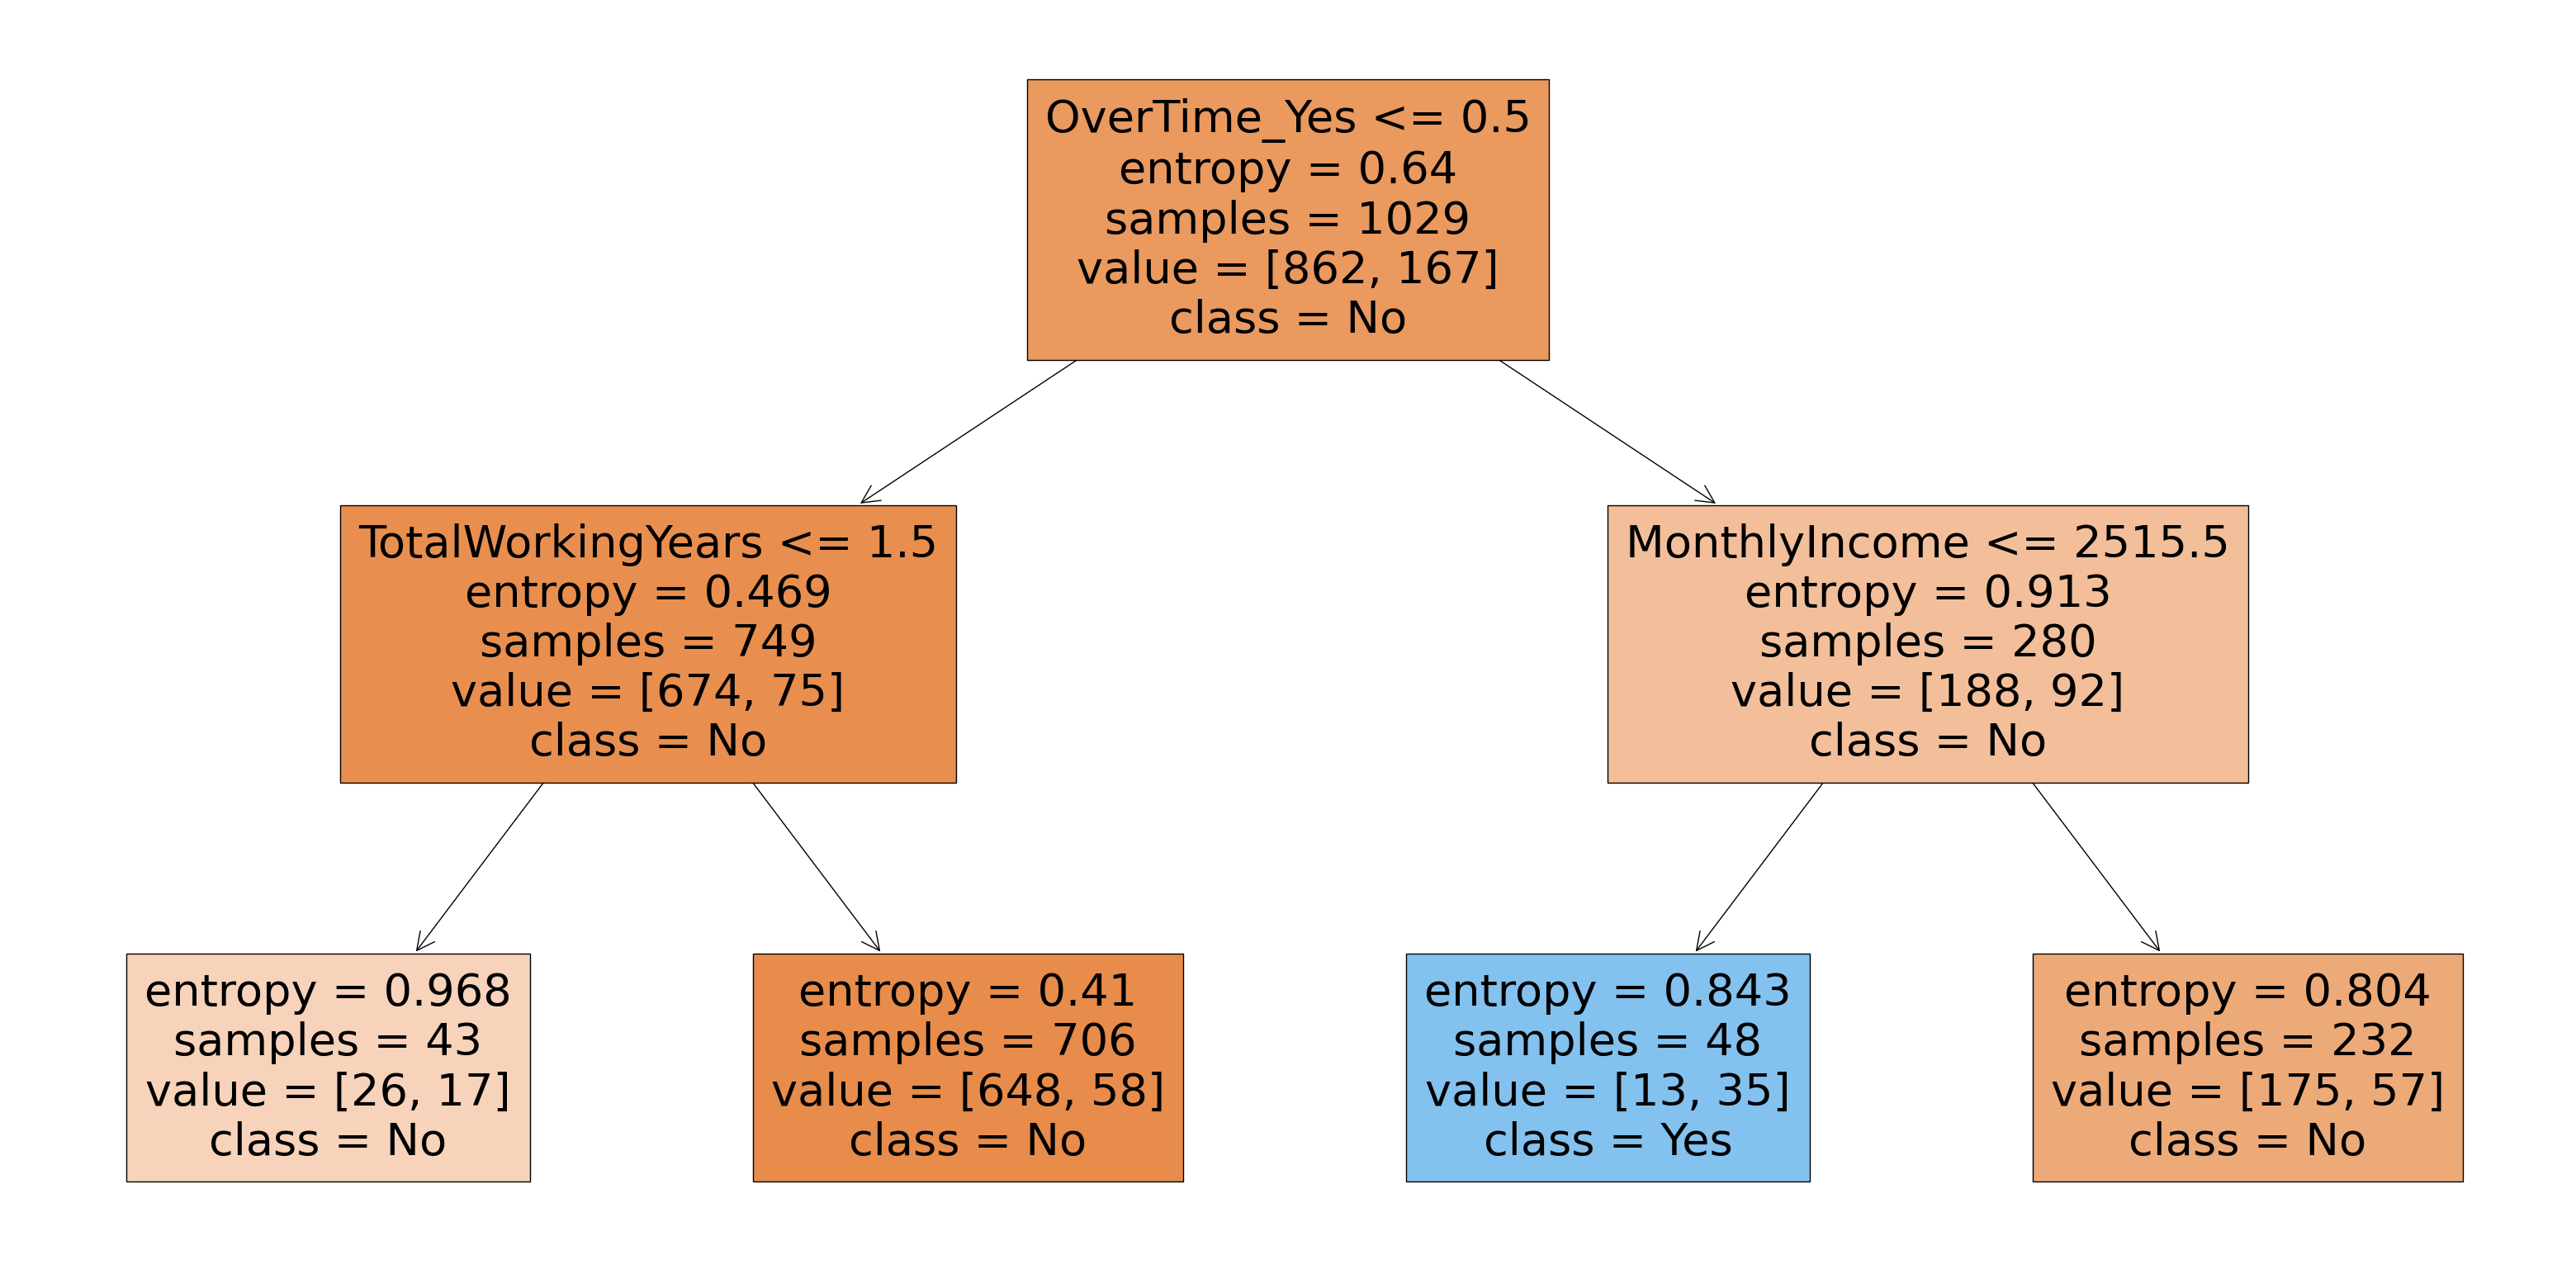

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plot_tree(dt2,class_names=['No','Yes'],feature_names=x.columns,filled=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

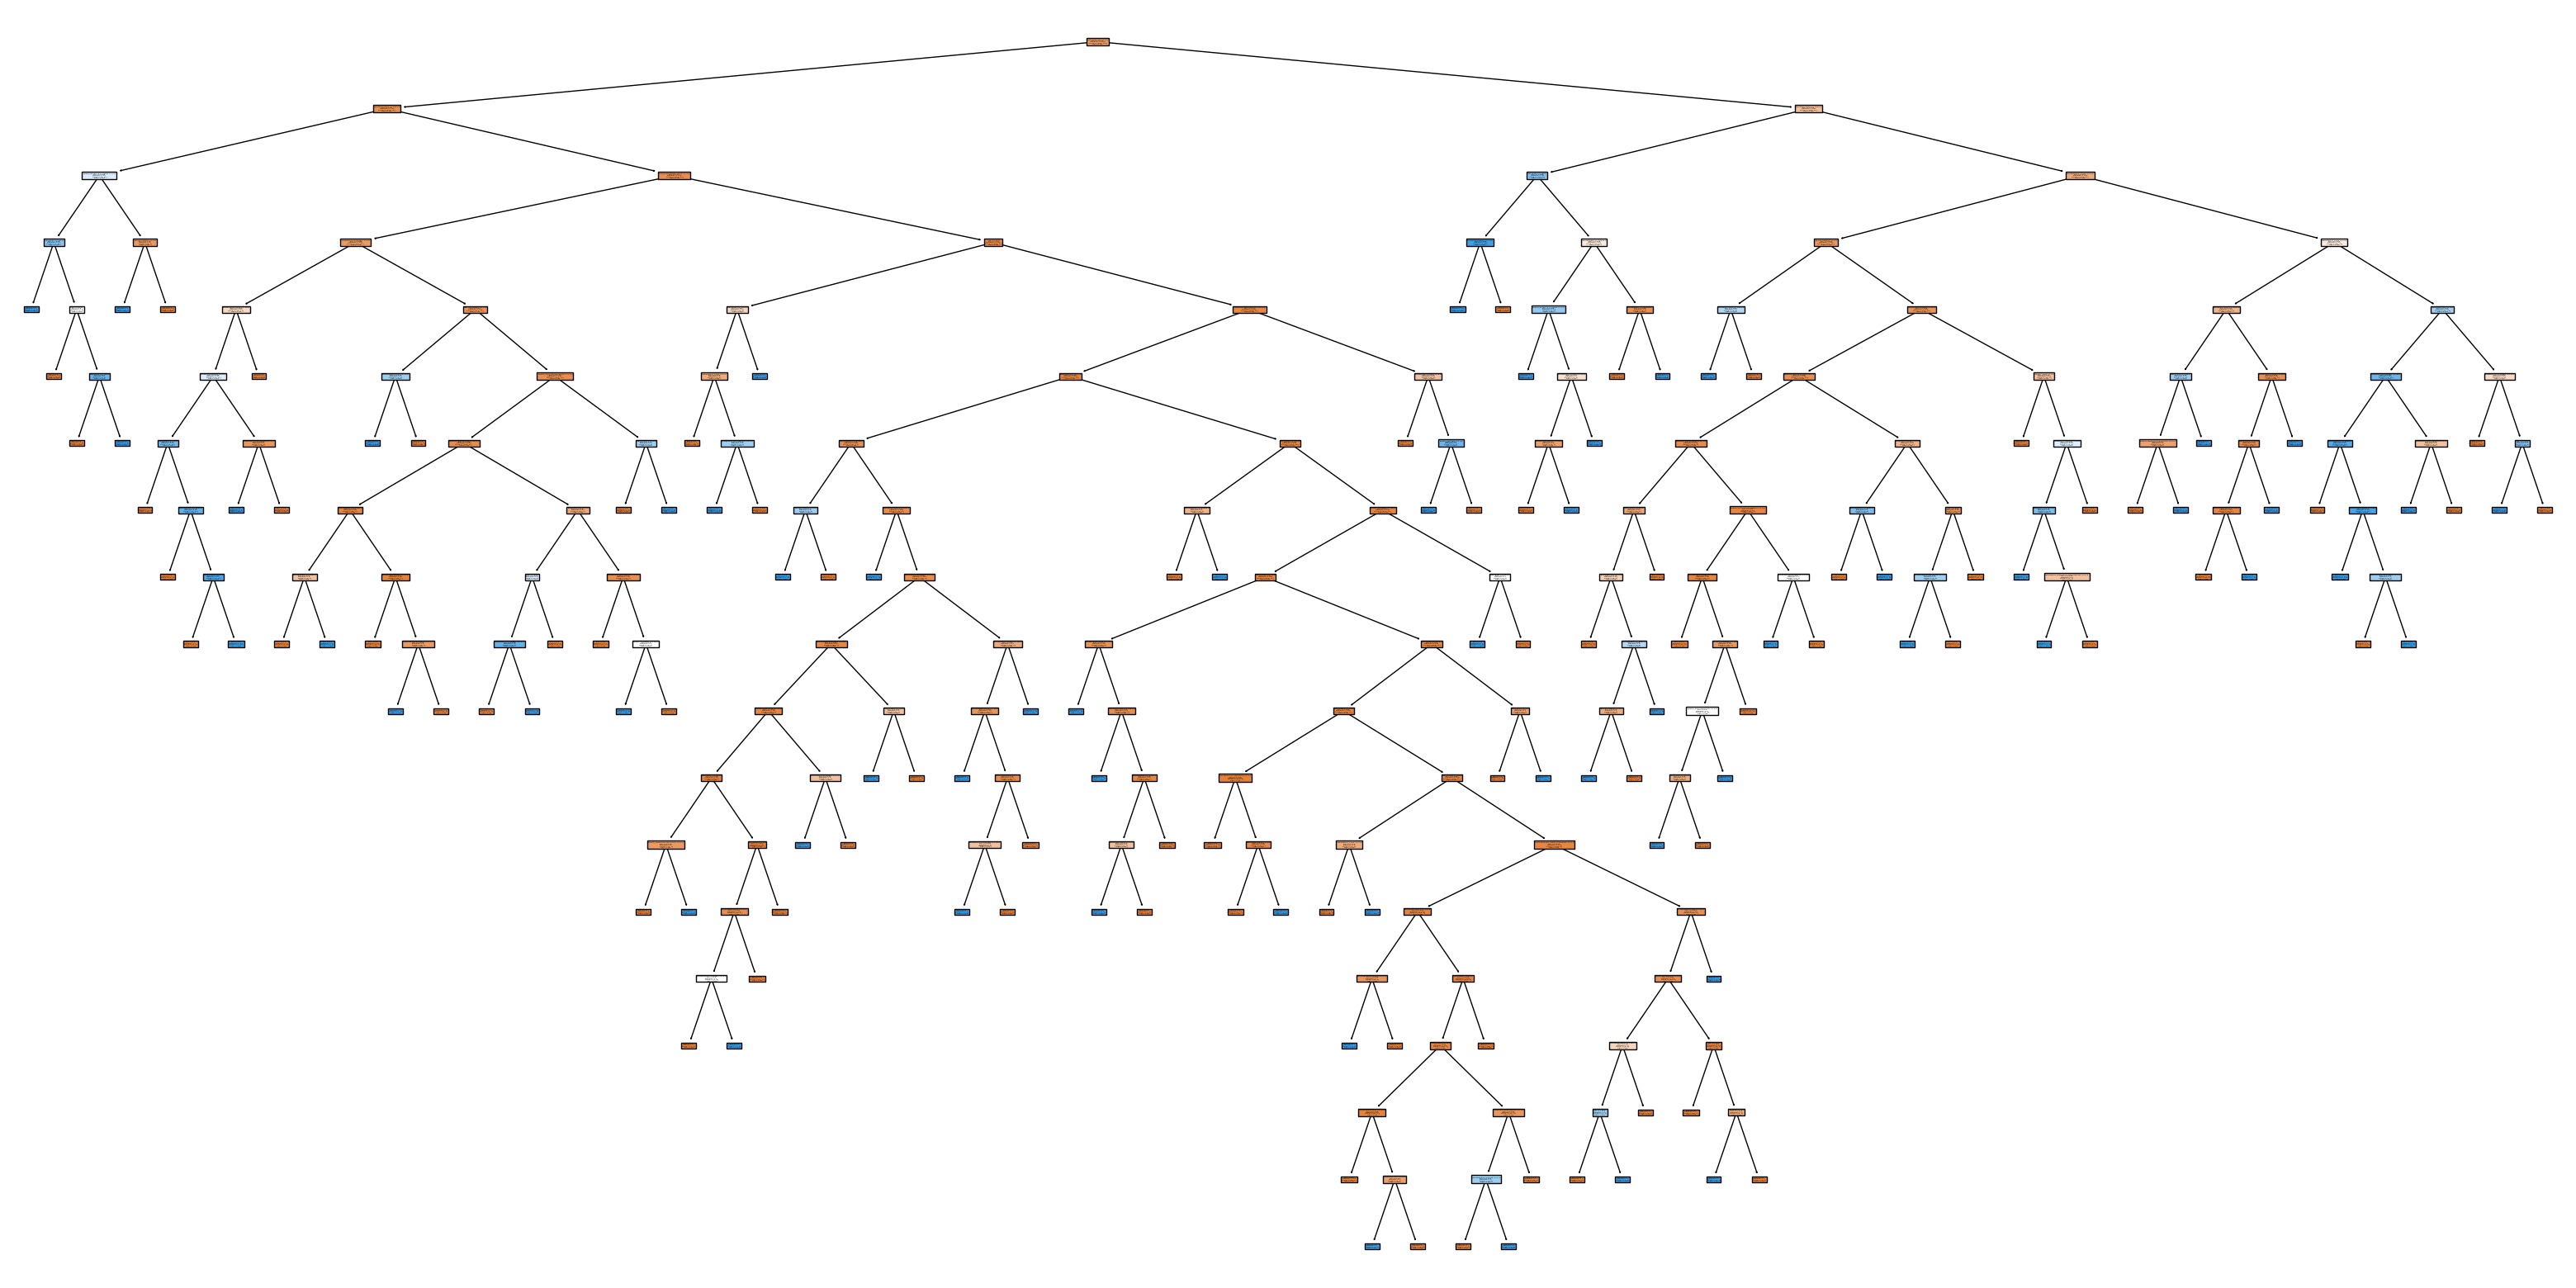

In [39]:
plt.figure(figsize=(40,20))
plot_tree(dt,class_names=['No','Yes'],feature_names=x.columns,filled=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

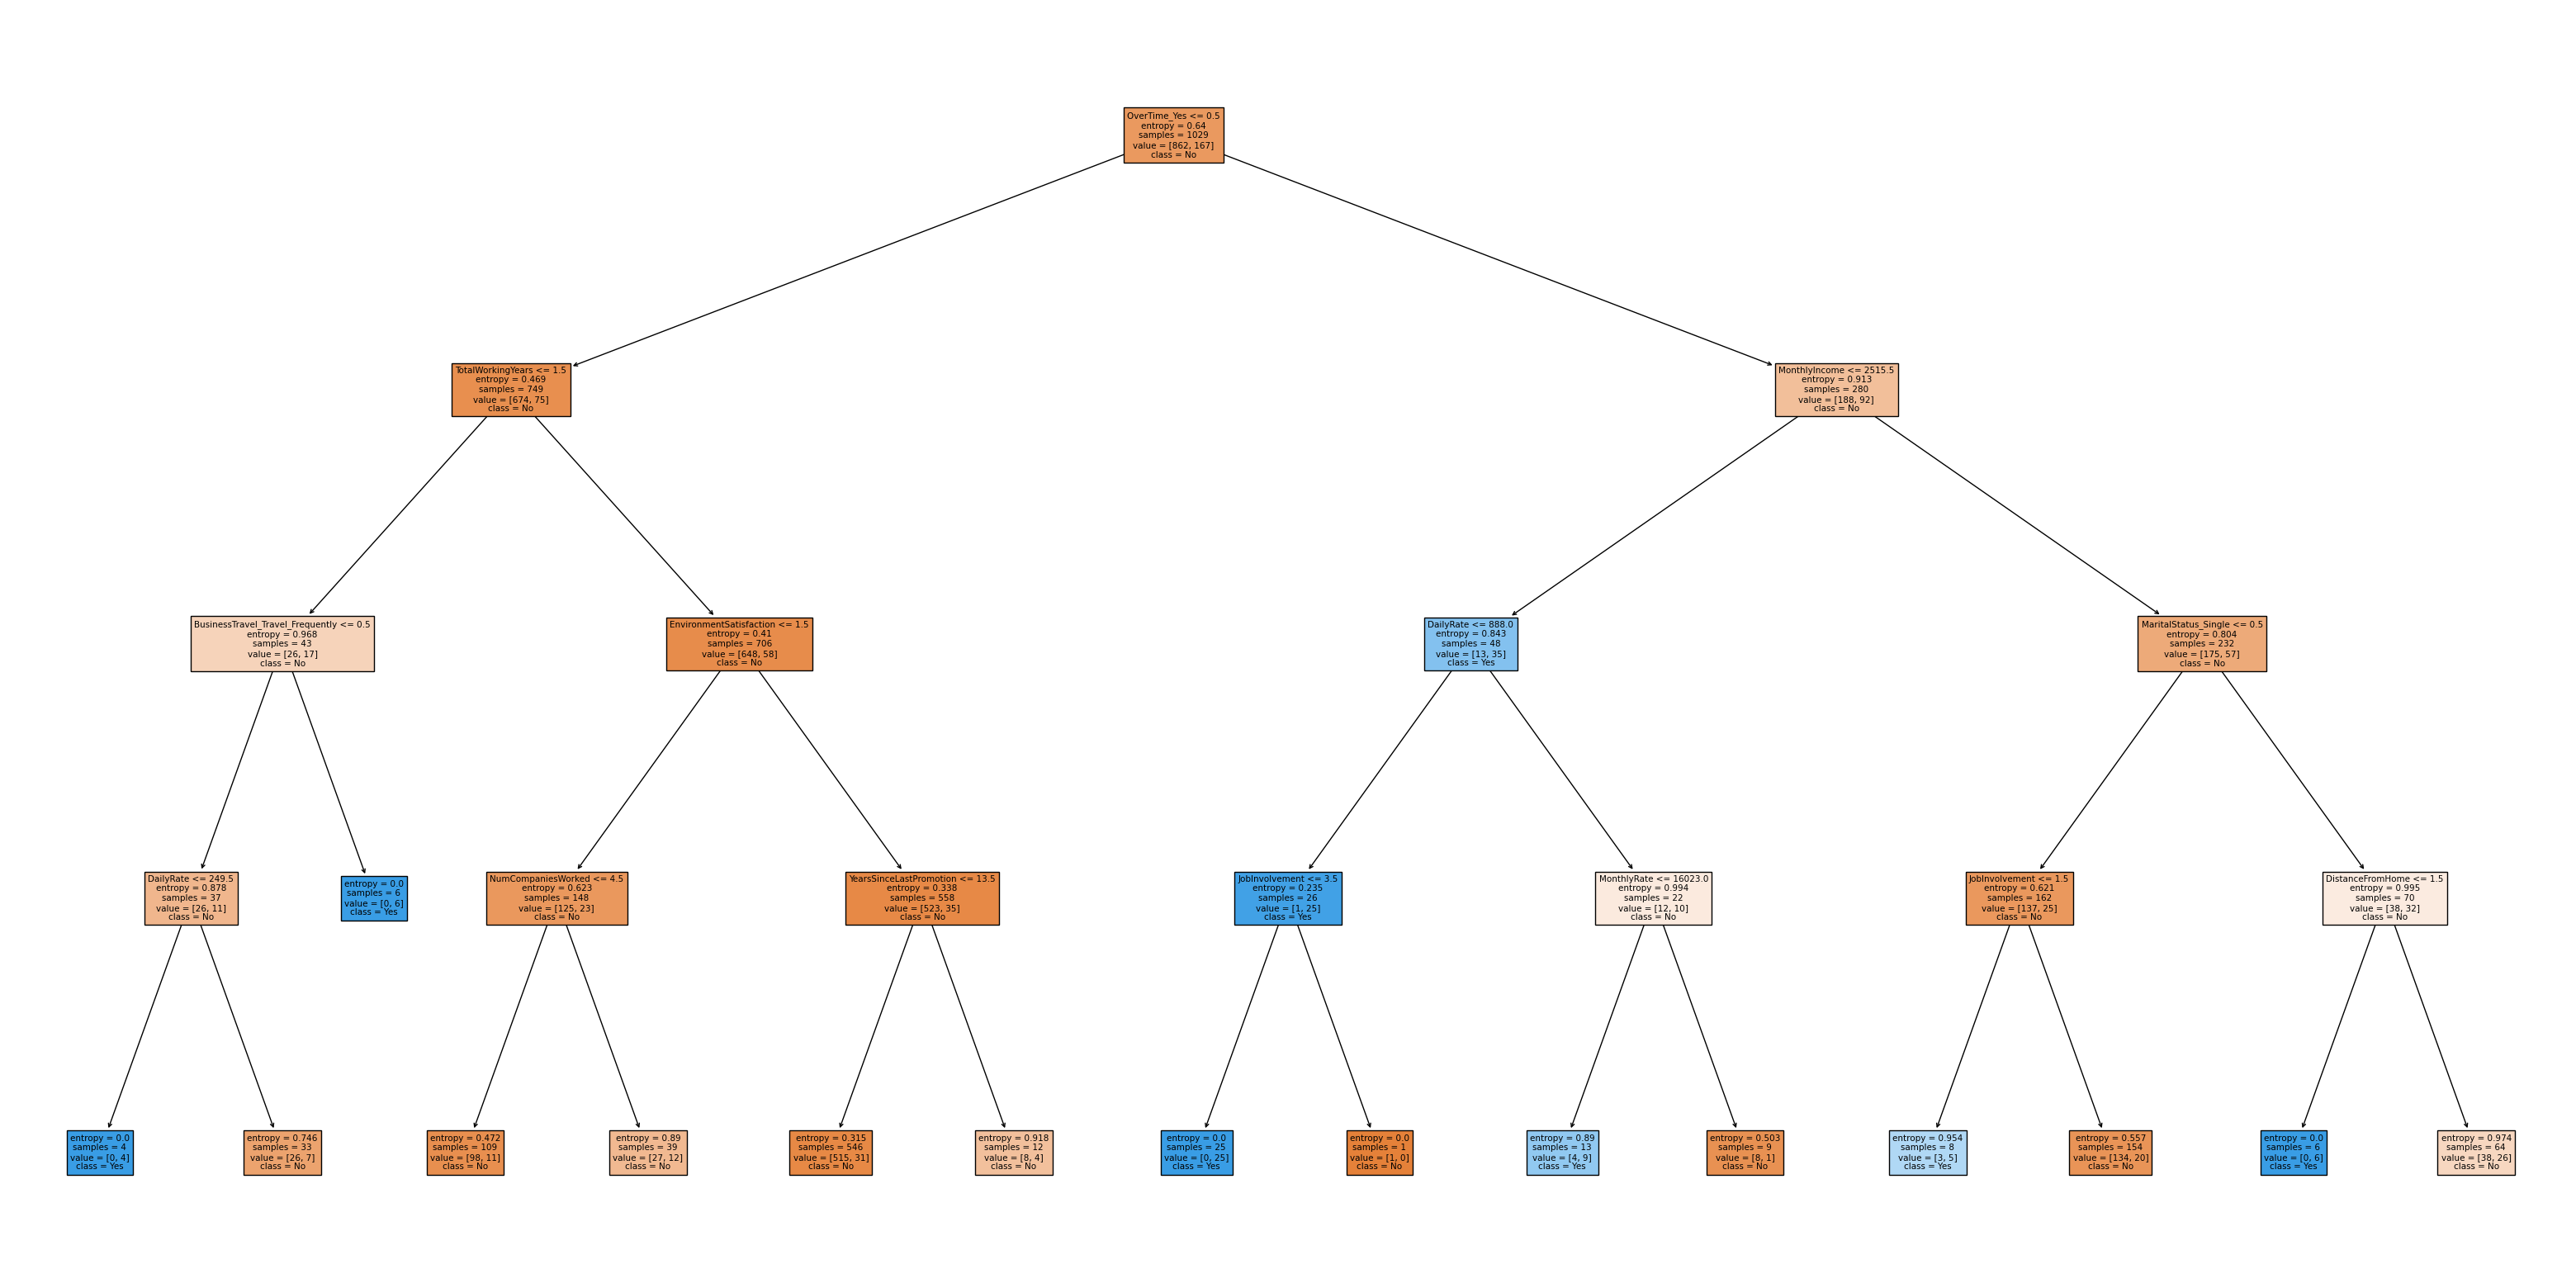

In [40]:
plt.figure(figsize=(40,20))
plot_tree(dt1,class_names=['No','Yes'],feature_names=x.columns,filled=True)
plt.show